(-0.5, 283.5, 176.5, -0.5)

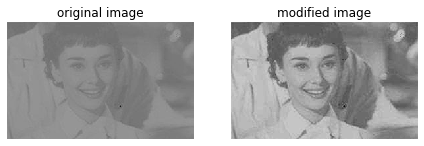

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import io

PATH = 'herpen2.jpg'
img = Image.open(PATH).convert('L')
img = np.array(img)

rows,cols=img.shape[:2]

plt.subplot(121)
plt.title('original image')

io.imshow(img)
plt.axis('off')

#可以修改线性函数的参数达到更好的效果。
r2=150
r1=100
s1=50
s2=200
img2=img


for i in range(rows):
    for j in range(cols):
        if (img[i,j]<=r1):
            img2[i,j]= img[i,j]*s1/r1
        elif  (img[i,j]>=r2):
            img2[i,j]= (img[i,j]-r2)*(255-s2)/(255-r2)+s2
        else :
            img2[i,j]= (img[i,j]-r1)*(s2-s1)/(r2-r1)+s1

plt.subplot(122)
plt.title('modified image')
io.imshow(img2)#可视化原始图像
plt.axis('off')

# img2= Image.fromarray(img2, mode = 'L')
# img2.save('herpen2.jpg')

C:\Users\13374\AppData\Local\Temp\ipykernel_22908\629265365.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hist[tuple(index_bin.astype(np.int))] += 1
C:\Users\13374\AppData\Local\Temp\ipykernel_22908\629265365.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes w

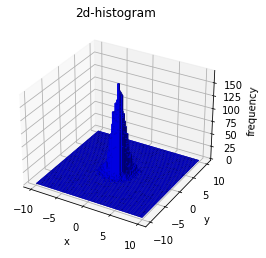

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def n_d_hist(data, dim, numBin, max_range, min_range):
    # 生成直方图的函数
    gridsize = tuple([numBin[i] for i in range(dim)]) # 统计各维度bin的数量
    hist = np.zeros(gridsize) 
    binSize = (max_range - min_range) / numBin # bin的宽度
    for each_data in range(np.size(data, 0)):
        index_bin = np.floor((data[each_data] - min_range) / binSize) # 判断落在哪个区间内
        index_bin = np.maximum(index_bin, 0)      
        index_bin = np.minimum(index_bin, numBin - 1)
        hist[tuple(index_bin.astype(np.int))] += 1
    return hist

np.random.seed(2333)
data = np.random.randn(10000, 2) # 生成2元正态分布数据
numBin = np.array([64, 64])
max_range, min_range = np.array([10, 10]),   np.array([-10, -10])
histogram = n_d_hist(data, 2, numBin, max_range, min_range)
# 绘图
xsize = (max_range[0] - min_range[0])/numBin[0]
ysize = (max_range[1] - min_range[1])/numBin[1]
x_coord, y_coord = np.meshgrid(np.arange(min_range[0], max_range[0], xsize),np.arange(min_range[1], max_range[1], ysize))
z_coord = histogram
x_coord, y_coord ,z_coord = x_coord.ravel(), y_coord.ravel(),z_coord.ravel() # 生成坐标等需要的数据

# plt.subplot(121)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.bar3d(x_coord, y_coord, np.zeros_like(x_coord), xsize, ysize, z_coord,color='b')
ax.set_title('2d-histogram')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('frequency')
plt.show()

In [45]:
from collections import Counter
#efficient local update of local histogram
def update_local_hist(img, k, old_hist, center_idx):
    '''
    input: img: m*n array
    k: batch length
    old_hist: previous hist generated: Counter
    center_idx: previous batch center
    '''
    (x, y) = center_idx
    center_length = (k-1)//2
    if center_idx==(center_length,center_length): # 第一个
        return Counter(img[:k, :k].reshape(-1))
    if (x - center_length) % 2 == 0:
        if y == center_length: # 下移
            return (old_hist + Counter(img[x + center_length, :k]) - \
                Counter(img[x - 1 - center_length, :k]))
        else: #继续移动
            return old_hist + Counter(img[(x - center_length):(x + center_length + 1), y + center_length]) -\
                 Counter(img[(x - center_length):(x + center_length + 1), y - 1 - center_length])
    pic_width = img.shape[1]
    # (x - center_length) % 2 ==1 的情况
    if y == pic_width - center_length - 1: #下移
        return old_hist + Counter(img[x + center_length, pic_width - k:]) -\
             Counter(img[x - 1 - center_length, pic_width - k:])
    else: # 否则继续移动
        return old_hist + Counter(img[(x - center_length):(x + center_length + 1), y - center_length]) -\
             Counter(img[(x - center_length):(x + center_length + 1), y + center_length + 1])

(-0.5, 511.5, 511.5, -0.5)

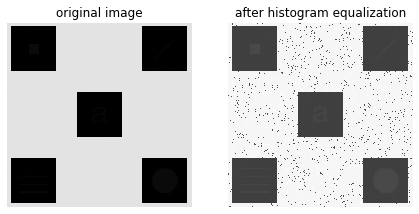

In [58]:
PATH = 'img 4.jpg'
img = Image.open(PATH).convert('L')
img = np.array(img)
plt.subplot(121)
rows,cols=img.shape[:2]

plt.subplot(121)
plt.title('original image')#原始图像

io.imshow(img)
plt.axis('off')

(m,n)=img.shape;
count=np.zeros(256);
for i in range(m):
    for j in range(n):
        count[img[i,j]]+=1
count=count/(m*n)
for i in range(1,256):
    count[i]=count[i-1]+count[i]  #累计分布
count=np.uint8(count*255);
for i in range(m):
    for j in range(n):
        img[i,j]=count[img[i,j]] #覆盖原来的图像
plt.subplot(122)
io.imshow(img)
plt.title('after histogram equalization')
plt.axis('off')


(504, 504)


(-0.5, 503.5, 503.5, -0.5)

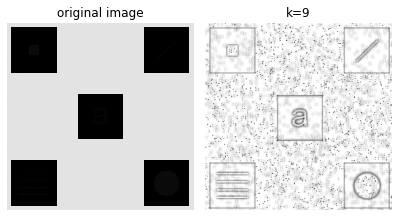

In [57]:
def localHist(img,k):
    """
    input: img: k*k*3 array
            k: param
    output: histogram
    """
    (m,n)=img.shape
    center=(k-1)//2
    temp_img=np.zeros((m+k-1,n+k-1),int)
    new_img=np.zeros((m+k-1,n+k-1),int)
    temp_img[center : m + center, center : n + center] = img
    local_hist = Counter()
    #小窗进行z字移动
    for x in range(center, m + center):
        visit_seq = range(center, n + center)
        if (x - center) % 2:
            visit_seq = reversed(visit_seq)#如果是奇数则反过来
        for y in visit_seq:
            local_hist = update_local_hist(temp_img,k, local_hist,(x, y)) # 2.2的函数更新直方图信息
            center_value = temp_img[x,y]
            cdf = np.zeros(center_value + 1)
            for i in range(center_value + 1): 
                cdf[i] = cdf[i - 1] + local_hist[i]
            cdf = np.round(255 * cdf / (k**2))
            new_img[x, y] = cdf[temp_img[x , y]] # 进行转换
    new_img = new_img[center:m - center, center: n - center]
    return new_img

img = Image.open('img 4.jpg').convert('L')
plt.subplot(121);
img = np.array(img)
io.imshow(img);
plt.axis('off')
plt.title('original image')
plt.subplot(122);
plt.title('k=9');
B=localHist(img,9);
newIm = Image.fromarray(B)
plt.imshow(newIm)
plt.axis('off')